# Import required libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Read Data

In [4]:
data = []

with open('SMSSpamCollection', 'r') as file:
    for line in file:
        label, message = line.strip().split('\t', 1)
        data.append((label, message))

df = pd.DataFrame(data, columns=['label', 'message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5574, 2)

# EDA

In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5160, 2)

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.label.value_counts()

label
ham     4518
spam     642
Name: count, dtype: int64

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_11408\4068742883.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_Class=pd.value_counts(df.label, sort= True)


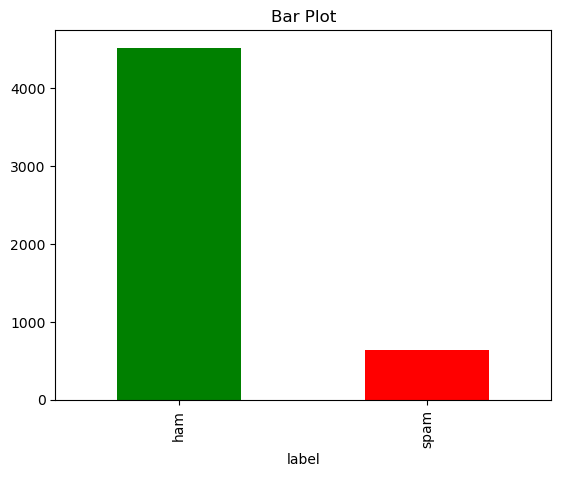

In [12]:
count_Class=pd.value_counts(df.label, sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])
plt.title('Bar Plot')
plt.show()

In [13]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0, 0.5, 'Frequência')

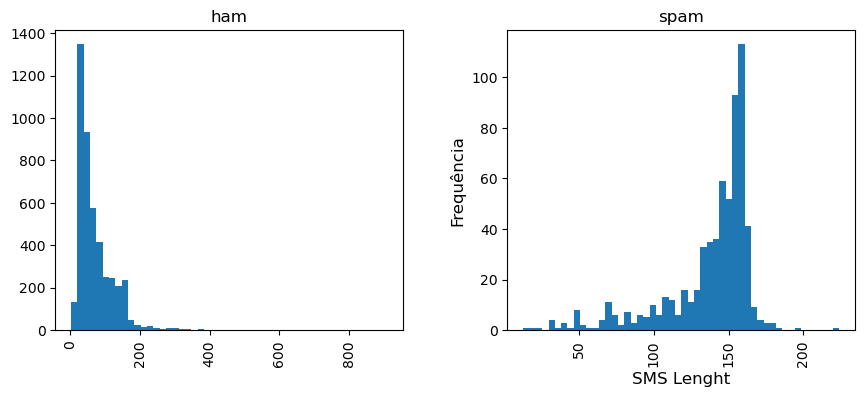

In [14]:
df.hist(column='length', by='label', bins=50,figsize=(10,4))
plt.xlabel("SMS Lenght",fontsize = 12) 
plt.ylabel("Frequência", fontsize = 12)

## Data Preprocessing

In [16]:
sw = set(stopwords.words("english"))
filters = set(stopwords.words("english"))
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\HP
[nltk_data]     EliteBook\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\HP
[nltk_data]     EliteBook\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
sms = []
for i in range(len(df)):
  cleaned = re.sub('[^a-zA-Z]', ' ', df['message'][i])
  cleaned = cleaned.lower()
  cleaned = word_tokenize(cleaned)
  cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in sw]
  cleaned = " ".join(cleaned)
  sms.append(cleaned)

In [19]:
# Words vectorizing
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['message'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

       00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5155  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5156  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5157  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5158  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5159  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zoe  zogtorius  zoom  zouk  zyada  

# Split Data

In [21]:
x = pd.concat([tfidf_df, df.length], axis=1)
y = df.label

In [22]:
# Encoding
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Deal with imbalanced data

In [25]:
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [26]:
y_train_resampled = pd.Series(y_train_resampled)
y_train_resampled.value_counts()

0    3628
1    3628
Name: count, dtype: int64

# Model building

### LgisticRegression

In [29]:
LR= LogisticRegression()
LR.fit(x_train_resampled,y_train_resampled)

C:\Users\HP EliteBook\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
LR.score(x_test, y_test)

0.9660852713178295

In [31]:
y_pred = LR.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       890
           1       0.88      0.87      0.88       142

    accuracy                           0.97      1032
   macro avg       0.93      0.92      0.93      1032
weighted avg       0.97      0.97      0.97      1032



### XGboost

In [33]:
XGB = XGBClassifier()
X_train_resampled_array = x_train_resampled.to_numpy()
XGB.fit(X_train_resampled_array, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
x_test_array = x_test.to_numpy()
XGB.score(x_test_array, y_test)

0.9767441860465116

In [35]:
y_pred = XGB.predict(x_test_array)
y_pred_labels = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       890
           1       0.96      0.87      0.91       142

    accuracy                           0.98      1032
   macro avg       0.97      0.93      0.95      1032
weighted avg       0.98      0.98      0.98      1032



### SVC

In [ ]:
svc = SVC(kernel='linear') 
svc.fit(x_train_resampled, y_train_resampled)

In [ ]:
svc.score(x_test, y_test)

In [ ]:
y_pred = svc.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

report = classification_report(y_test, y_pred_labels)
print(report)